# EDA - Conference Papers

In [1]:
%matplotlib inline 
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.max_colwidth', None)
import numpy as np
from wordcloud import WordCloud
import utils
import umap
import hdbscan
import importlib
importlib.reload(utils)

<module 'utils' from '/Users/kylehamilton/MyDocuments/ML-Labs/neuro-symbolic-AI/neuro-symbolic-ai-systematic-review/scopus/utils.py'>

In [2]:
import matplotlib as mpl
plt.style.use('presentation.mplstyle')
mpl.matplotlib_fname()

'/Users/kylehamilton/MyDocuments/ML-Labs/neuro-symbolic-AI/neuro-symbolic-ai-systematic-review/scopus/matplotlibrc'

In [128]:
# The scopus-conference-papers.csv was cleaned using OpenRefine 
# to standardize publisher names and conference names (ie, by removing dates from the name, and capitalization)

df=pd.read_csv("scopus-cp-2018.csv")

In [129]:
df.columns

Index(['Authors', 'Author(s) ID', 'Title', 'Year', 'Source title', 'Volume',
       'Issue', 'Art. No.', 'Page start', 'Page end', 'Page count', 'Cited by',
       'DOI', 'Link', 'Abstract', 'Author Keywords', 'Index Keywords',
       'References', 'Correspondence Address', 'Sponsors', 'Publisher',
       'Conference name', 'Conference date', 'Conference location',
       'Conference code', 'Abbreviated Source Title', 'Document Type',
       'Publication Stage', 'Open Access', 'Source', 'EID'],
      dtype='object')

In [130]:
len(df)

232

In [131]:
def drawCloud(text):
    wc = WordCloud(background_color="white", 
                   max_words=350, 
                   width=1000, 
                   height=600, 
                   random_state=1).generate(text)

    plt.figure(figsize=(15,15))
    plt.imshow(wc)
    plt.axis("off")

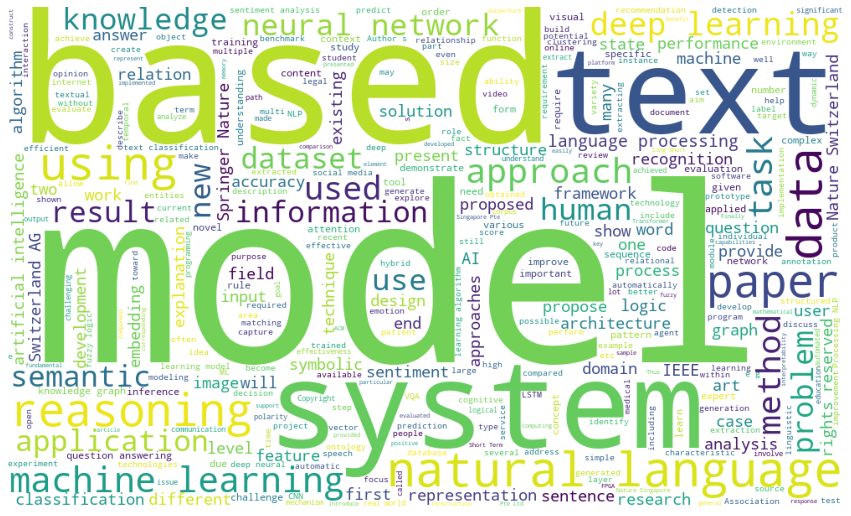

In [132]:
text = ','.join(list(df['Abstract']))
drawCloud(text)

In [133]:
df['Cited by'] = df['Cited by'].fillna(0)

<AxesSubplot:title={'center':'Number of citations by year'}, xlabel='Year', ylabel='Cited by'>

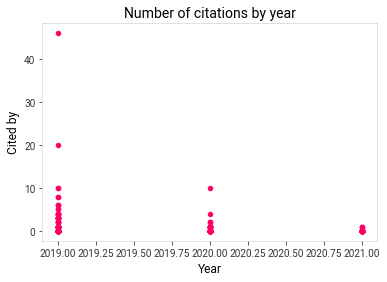

In [134]:
df.plot.scatter('Year','Cited by',title="Number of citations by year")

In [135]:
df.sort_values(by='Cited by',ascending=False)[['Title', 'Year','Cited by']]

,Title,Year,Cited by
15,"The neuro-symbolic concept learner: Interpreting scenes, words, and sentences from natural supervision",2019,46.0
154,CLEVR-REF+: Diagnosing visual reasoning with referring expressions,2019,20.0
186,Interpretable and steerable sequence learning via prototypes,2019,10.0
82,Deep probabilistic logic: A unifying framework for indirect supervision,2020,10.0
180,Complex Event Analysis of Urban Environmental Data based on Deep CNN of Spatiotemporal Raster Images,2019,10.0
...,...,...,...
98,Mapping natural-language problems to formal-language solutions using structured neural representations,2020,0.0
99,Using a skip-gram architecture for model contextualization in CARS,2019,0.0
100,Applying formal logic validation to enhance natural language understanding,2019,0.0
101,Applying formal logic validation to enhance natural language understanding,2019,0.0


### Can we remove papers which have no citations if they are older than 2021?
### NO - we did not end up doing this
* Yields 126 rows

In [136]:
df=df.loc[(df['Cited by']==0) & (df['Year'] < 2021)].sort_values(by='Cited by',ascending=False)

In [137]:
df[['Title', 'Year','Cited by']]

,Title,Year,Cited by
1,Neural-Symbolic Relational Reasoning on Graph Models: Effective Link Inference and Computation from Knowledge Bases,2020,0.0
170,Extracting Quality Attributes from User Stories for Early Architecture Decision Making,2019,0.0
168,Part of Speech Tagging for Kayah Language Using Hidden Markov Model,2019,0.0
167,Evidence Humans Provide When Explaining Data-Labeling Decisions,2019,0.0
162,Using embedding-based metrics to expedite patients recruitment process for clinical trials,2019,0.0
...,...,...,...
69,Just Add Functions: A Neural-Symbolic Language Model,2020,0.0
68,Framework for mining hybrid automata from a constrained machine learning architecture,2020,0.0
66,Multimodal graph networks for compositional generalization in visual question answering,2020,0.0
62,Question answering via web extracted tables,2019,0.0


In [142]:
[print (i) for i in df['Conference name'].unique()]

29th International Conference on Artificial Neural Networks, ICANN 2020
2019 IEEE International Conference on Software Architecture - Companion, ICSA-C 2019
4th International Conference on Electrical, Electronics, Communication, Computer Technologies and Optimization Techniques, ICEECCOT 2019
17th IFIP TC13 International Conference on Human-Computer Interaction, INTERACT 2019
2nd International Conference on Big Data and Cyber-Security Intelligence, BDCSIntell 2019
1st Workshop on Bridging the Gap between Information Science, Information Retrieval and Data Science, BIRDS 2020
17th International Conference on Service-Oriented Computing, ICSOC 2019
39th SGAI International Conference on Innovative Techniques and Applications of Artificial Intelligence, AI 2019
2019 AAAI Spring Symposium on Combining Machine Learning with Knowledge Engineering, AAAI-MAKE 2019
12th International Conference on Recent Advances in Natural Language Processing, RANLP 2019
31st IEEE International System on Chip Co

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

### Using the previously generated list of top publishers, does it make sense to filter the dataframe to exclude articles not in this list
### NO - we did not end up doing this
* filterd-search-results.ipynb

In [80]:
top_publishers=['ACM',
 'American Association for the Advancement of Science',
 'American Chemical Society',
 'American Institute of Physics',
 'American Society for Microbiology',
 'Association for Computing Machinery',
 'Cairo University',
 'Chongqing University of Posts and Telecommunications',
 'Elsevier',
 'Emerald',
 'IEEE',
 'IOS Press',
 'Institute for Operations Research and the Management Sciences',
 'King Saud University',
 'MIT Press',
 'Mary Ann Liebert',
 'Morgan & Claypool Publishers',
 'Now Publishers Inc',
 'Now Publishers Inc.',
 'Optical Society of America',
 'Oxford University Press',
 'Public Library of Science',
 'SAGE',
 'Society for Industrial and Applied Mathematics',
 'Springer Nature',
 'Taylor & Francis',
 'University of California Press',
 'University of Minnesota',
 'Wiley-Blackwell']